In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
import gmaps



from numpy.random import seed
seed(1)

from scipy import stats
from scipy.stats import linregress

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
df = pd.read_csv('austinHousingData.csv')

In [8]:
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [9]:
list(df.columns)

['zpid',
 'city',
 'streetAddress',
 'zipcode',
 'description',
 'latitude',
 'longitude',
 'propertyTaxRate',
 'garageSpaces',
 'hasAssociation',
 'hasCooling',
 'hasGarage',
 'hasHeating',
 'hasSpa',
 'hasView',
 'homeType',
 'parkingSpaces',
 'yearBuilt',
 'latestPrice',
 'numPriceChanges',
 'latest_saledate',
 'latest_salemonth',
 'latest_saleyear',
 'latestPriceSource',
 'numOfPhotos',
 'numOfAccessibilityFeatures',
 'numOfAppliances',
 'numOfParkingFeatures',
 'numOfPatioAndPorchFeatures',
 'numOfSecurityFeatures',
 'numOfWaterfrontFeatures',
 'numOfWindowFeatures',
 'numOfCommunityFeatures',
 'lotSizeSqFt',
 'livingAreaSqFt',
 'numOfPrimarySchools',
 'numOfElementarySchools',
 'numOfMiddleSchools',
 'numOfHighSchools',
 'avgSchoolDistance',
 'avgSchoolRating',
 'avgSchoolSize',
 'MedianStudentsPerTeacher',
 'numOfBathrooms',
 'numOfBedrooms',
 'numOfStories',
 'homeImage']

In [22]:
corrDf = df[['latitude', 'longitude','hasCooling','hasHeating', 'hasView', 'yearBuilt', 'latestPrice', 'numOfAppliances', 'lotSizeSqFt','livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating','numOfBathrooms', 'numOfBedrooms', 'numOfStories']]

In [23]:
corrMatrix = corrDf.corr()
print (corrMatrix)

                   latitude  longitude  hasCooling  hasHeating   hasView  \
latitude           1.000000   0.347597    0.037770    0.028263  0.036431   
longitude          0.347597   1.000000   -0.063926   -0.040448 -0.124299   
hasCooling         0.037770  -0.063926    1.000000    0.679140  0.028798   
hasHeating         0.028263  -0.040448    0.679140    1.000000  0.025394   
hasView            0.036431  -0.124299    0.028798    0.025394  1.000000   
yearBuilt         -0.116519  -0.252537    0.097967    0.018451  0.103222   
latestPrice        0.071547  -0.184079    0.010075    0.002410  0.133969   
numOfAppliances    0.007396  -0.024084    0.189035    0.145359  0.172580   
lotSizeSqFt        0.001960   0.000490    0.001095    0.000759 -0.004186   
livingAreaSqFt     0.084065  -0.334297    0.054849    0.022725  0.140933   
avgSchoolDistance -0.043530  -0.288116    0.005214   -0.020551  0.086565   
avgSchoolRating    0.260637  -0.557531    0.071524    0.048103  0.120199   
numOfBathroo

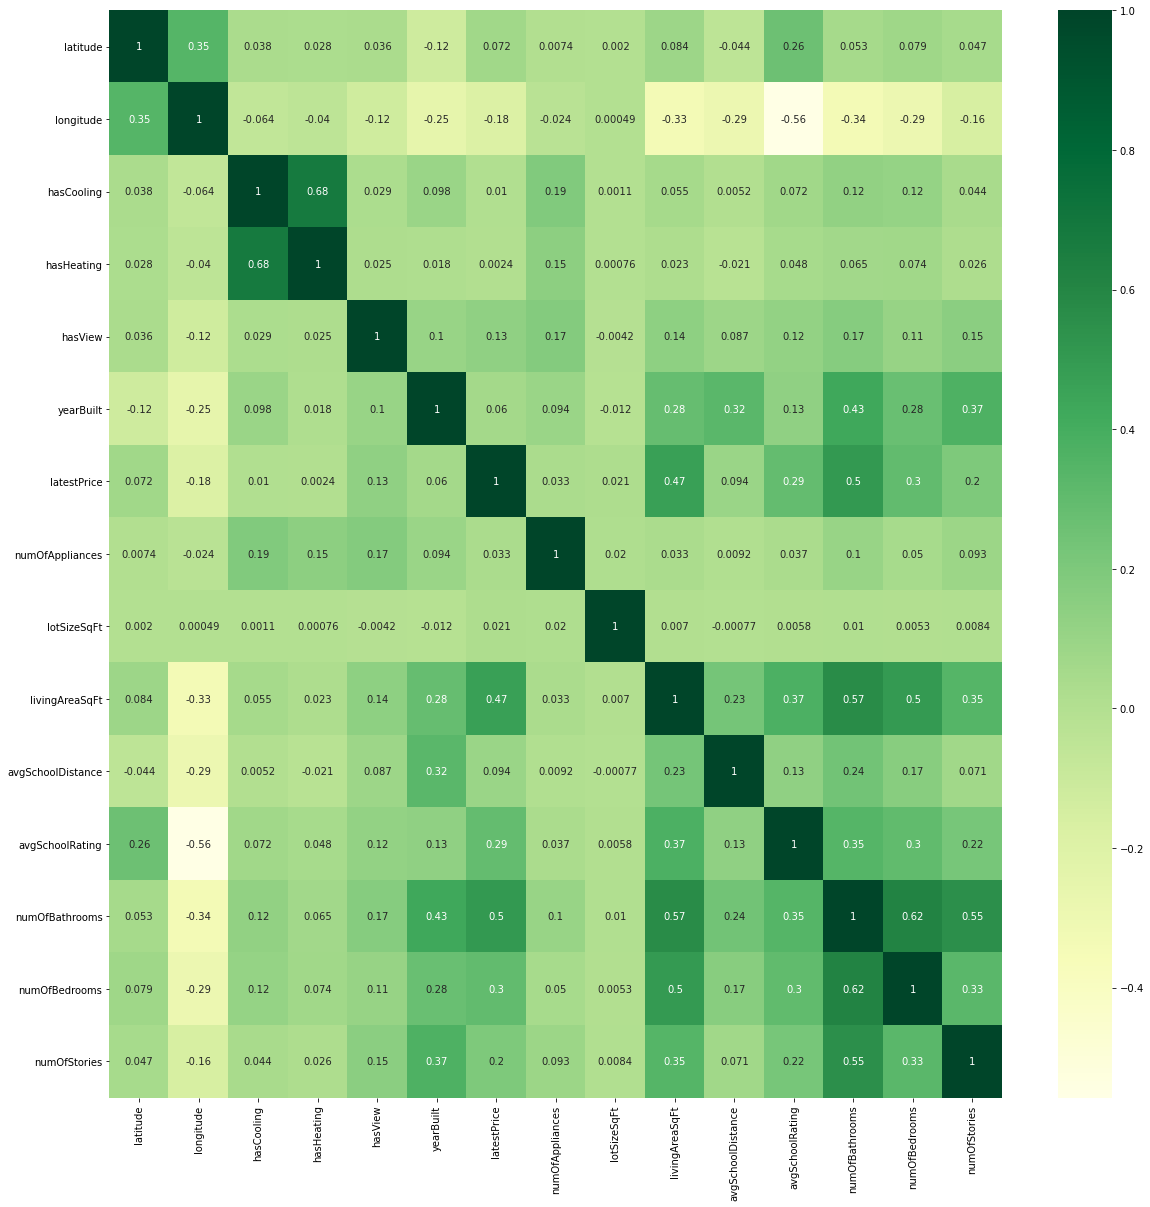

In [24]:
sn.heatmap(corrMatrix, annot=True, cmap="YlGn")
plt.rcParams["figure.figsize"] = (20,20)
plt.savefig('housing.png')
plt.show()

In [34]:
corrDf.dtypes

latitude             float64
longitude            float64
hasCooling              bool
hasHeating              bool
hasView                 bool
yearBuilt              int64
latestPrice          float64
numOfAppliances        int64
lotSizeSqFt          float64
livingAreaSqFt       float64
avgSchoolDistance    float64
avgSchoolRating      float64
numOfBathrooms       float64
numOfBedrooms          int64
numOfStories           int64
dtype: object

In [35]:
X=corrDf.drop("latestPrice", axis=1)
y=corrDf['latestPrice']

print(X.shape, y.shape)

(15171, 14) (15171,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=101, test_size=0.3)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


In [37]:
model = Sequential()

model.add(Dense(15,activation='relu'))


model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1))

In [38]:
model.compile(optimizer='adam',loss='mse')

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
83/83 [==============================] - 1s 7ms/step - loss: 465674403840.0000 - val_loss: 474394099712.0000
Epoch 2/400
83/83 [==============================] - 0s 4ms/step - loss: 465613389824.0000 - val_loss: 474203684864.0000
Epoch 3/400
83/83 [==============================] - 0s 4ms/step - loss: 464903307264.0000 - val_loss: 472556666880.0000
Epoch 4/400
83/83 [==============================] - 0s 4ms/step - loss: 460874776576.0000 - val_loss: 464964976640.0000
Epoch 5/400
83/83 [==============================] - 0s 4ms/step - loss: 446702223360.0000 - val_loss: 442139607040.0000
Epoch 6/400
83/83 [==============================] - 0s 4ms/step - loss: 411372453888.0000 - val_loss: 391973273600.0000
Epoch 7/400
83/83 [==============================] - 0s 4ms/step - loss: 345440813056.0000 - val_loss: 312735072256.0000
Epoch 8/400
83/83 [==============================] - 0s 4ms/step - loss: 263623868416.0000 - val_loss: 236787138560.0000
Epoch 9/400
83/83 [=============

Epoch 135/400
83/83 [==============================] - 0s 4ms/step - loss: 138648240128.0000 - val_loss: 161720401920.0000
Epoch 136/400
83/83 [==============================] - 0s 4ms/step - loss: 137981427712.0000 - val_loss: 161696579584.0000
Epoch 137/400
83/83 [==============================] - 0s 4ms/step - loss: 137340223488.0000 - val_loss: 161762459648.0000
Epoch 138/400
83/83 [==============================] - 0s 3ms/step - loss: 136672845824.0000 - val_loss: 161964654592.0000
Epoch 139/400
83/83 [==============================] - 0s 3ms/step - loss: 136045928448.0000 - val_loss: 162124644352.0000
Epoch 140/400
83/83 [==============================] - 0s 4ms/step - loss: 135442407424.0000 - val_loss: 162335309824.0000
Epoch 141/400
83/83 [==============================] - 0s 4ms/step - loss: 134737952768.0000 - val_loss: 162853879808.0000
Epoch 142/400
83/83 [==============================] - 0s 4ms/step - loss: 134237151232.0000 - val_loss: 163134947328.0000
Epoch 143/400
83

83/83 [==============================] - 0s 4ms/step - loss: 110439235584.0000 - val_loss: 260215881728.0000
Epoch 268/400
83/83 [==============================] - 0s 4ms/step - loss: 110551203840.0000 - val_loss: 259086008320.0000
Epoch 269/400
83/83 [==============================] - 0s 4ms/step - loss: 110418100224.0000 - val_loss: 258687680512.0000
Epoch 270/400
83/83 [==============================] - 0s 4ms/step - loss: 110365728768.0000 - val_loss: 260679041024.0000
Epoch 271/400
83/83 [==============================] - 0s 4ms/step - loss: 110289788928.0000 - val_loss: 260903075840.0000
Epoch 272/400
83/83 [==============================] - 0s 4ms/step - loss: 110299889664.0000 - val_loss: 260849467392.0000
Epoch 273/400
83/83 [==============================] - 0s 4ms/step - loss: 110242643968.0000 - val_loss: 261820743680.0000
Epoch 274/400
83/83 [==============================] - 0s 4ms/step - loss: 110272421888.0000 - val_loss: 260808982528.0000
Epoch 275/400
83/83 [=========

Epoch 334/400
83/83 [==============================] - 0s 4ms/step - loss: 108385476608.0000 - val_loss: 275974455296.0000
Epoch 335/400
83/83 [==============================] - 0s 4ms/step - loss: 108285329408.0000 - val_loss: 274913198080.0000
Epoch 336/400
83/83 [==============================] - 0s 4ms/step - loss: 108276457472.0000 - val_loss: 273844436992.0000
Epoch 337/400
83/83 [==============================] - 0s 4ms/step - loss: 108330590208.0000 - val_loss: 275376013312.0000
Epoch 338/400
83/83 [==============================] - 0s 4ms/step - loss: 108140699648.0000 - val_loss: 275512655872.0000
Epoch 339/400
83/83 [==============================] - 0s 4ms/step - loss: 108082118656.0000 - val_loss: 275819954176.0000
Epoch 340/400
83/83 [==============================] - 0s 4ms/step - loss: 108026830848.0000 - val_loss: 276059127808.0000
Epoch 341/400
83/83 [==============================] - 0s 4ms/step - loss: 108134957056.0000 - val_loss: 275735642112.0000
Epoch 342/400
83

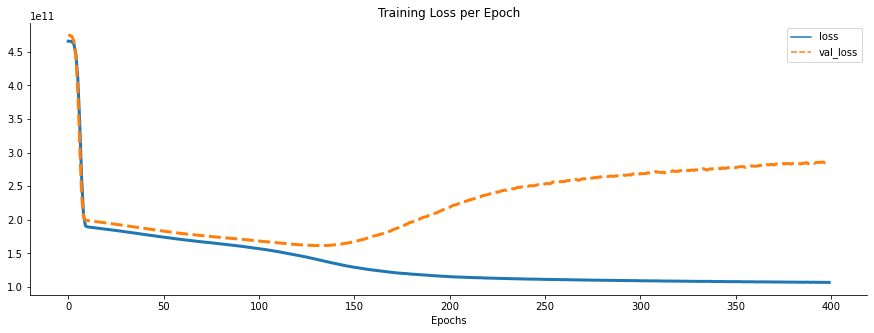

In [39]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sn.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sn.despine()


In [40]:
predictions = model.predict(X_test)


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

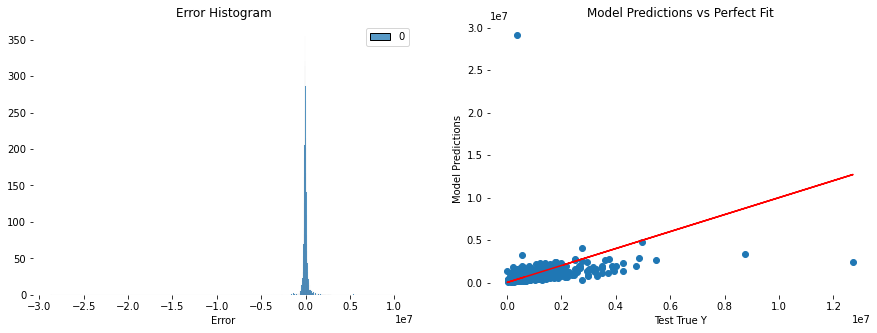

In [42]:
f, axes = plt.subplots(1, 2,figsize=(15,5))


plt.scatter(y_test,predictions)


plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(4552, 1) - predictions
sn.histplot(errors, ax=axes[0])

sn.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [47]:
house1 = corrDf.drop('latestPrice',axis=1).iloc[0]
print(f'Features of new house:\n{house1}')

house1 = scaler.transform(house1.values.reshape(-1, 14))

print('\nOriginal Price:', corrDf.iloc[0]['latestPrice'])

print('\nPredicted Price:',model.predict(house1)[0,0])

Features of new house:
latitude             30.4306
longitude           -97.6631
hasCooling              True
hasHeating              True
hasView                False
yearBuilt               2012
numOfAppliances            5
lotSizeSqFt             6011
livingAreaSqFt          2601
avgSchoolDistance    1.26667
avgSchoolRating      2.66667
numOfBathrooms             3
numOfBedrooms              4
numOfStories               2
Name: 0, dtype: object

Original Price: 305000.0

Predicted Price: 381863.16
